In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from constants import *

In [2]:
metrics = pd.read_csv(os.path.join("results", "metrics.csv"))

In [3]:
metrics.head()

,model,task,from_lang,to_lang,success,valid,codebleu,bleu,meteor,rouge1,rouge2,rougeL,rougeLsum,chrF,ter,wer
0,deepseekcoder7b,bit_ops,py,c,1.0,0.0,0.291374,0.130275,0.362417,0.152866,0.038462,0.101911,0.152866,27.217825,198.000000,2.020202
1,codegeex4,str_interp,c,java,1.0,1.0,0.257701,0.260155,0.687822,0.342857,0.181818,0.342857,0.342857,42.624201,130.769231,1.416667
2,yicoder2b,str_interp,cpp,go,1.0,1.0,0.530565,0.292182,0.648074,0.478873,0.318841,0.478873,0.478873,47.962884,116.000000,1.304348
3,codeqwen,int_arith,go,cpp,1.0,1.0,0.499523,0.239201,0.679556,0.386364,0.206107,0.378788,0.378788,46.138403,214.705882,2.179104
4,magicoder7b,file_size,java,rs,1.0,0.0,0.327270,0.157098,0.257040,0.214286,0.073171,0.214286,0.214286,28.293514,87.931034,0.886792


In [4]:
TASK_SHORT_NAMES = {
    "bit_ops": "Bitwise Operations",
    "int_arith": "Integer Arithmetic",
    "int_factors": "Integer Factors",
    "int_cmp": "Integer Comparison",
    "logic_ops": "Logical Operations",
    "str_append": "String Append",
    "str_cmp": "String Comparision",
    "str_concat": "String Concatenation",
    "str_interp": "String Interpolation",
    "str_match": "String Matching",
    "str_prepend": "Prepend String",
    "str_substring": "Extract Substring",
    "dir_make": "Create Directory",
    "file_exists": "File Existence",
    "file_create": "Create File",
    "file_size": "File Size",
    "file_rename": "Rename File",
}

In [5]:
metrics["model"] = metrics["model"].apply(lambda x: MODELS[x])
metrics["task"] = metrics["task"].apply(lambda x: TASK_SHORT_NAMES[x])

In [6]:
metrics = metrics.rename(
    columns={
        "codebleu": "CodeBLEU",
        "bleu": "BLEU",
        "meteor": "METEOR",
        "rouge1": "ROUGE-1",
        "wer": "WER",
    }
)

In [7]:
metrics[metrics["success"] > 0]["valid"].value_counts()

valid
1.0    6683
0.0    3963
Name: count, dtype: int64

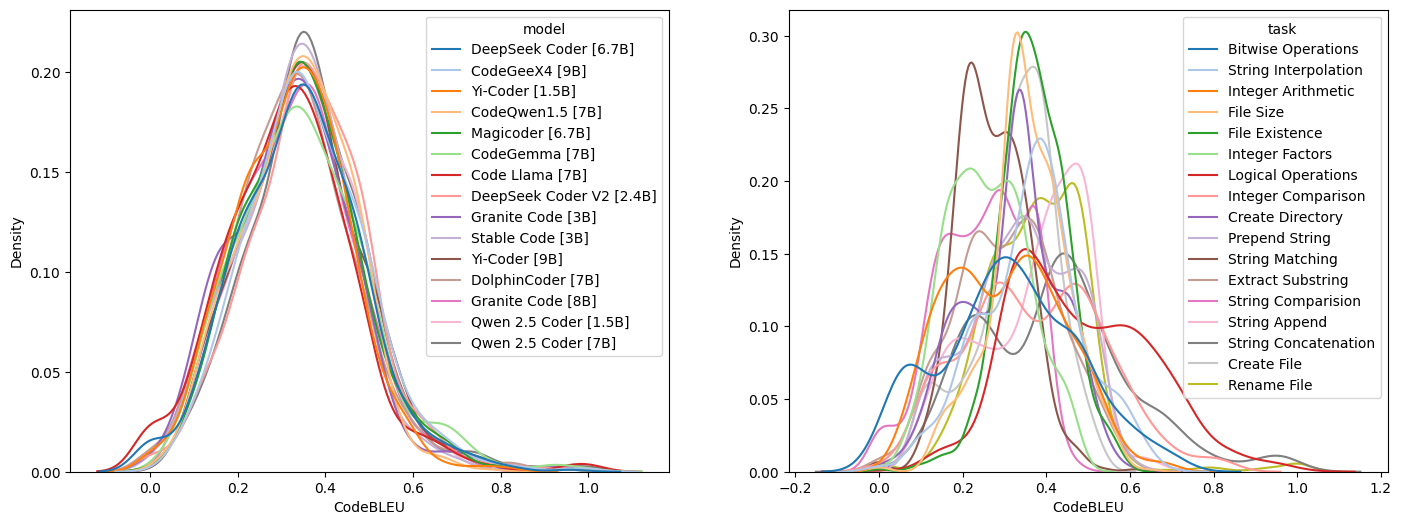

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="CodeBLEU", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="CodeBLEU", hue="task", palette="tab20", ax=ax[1])

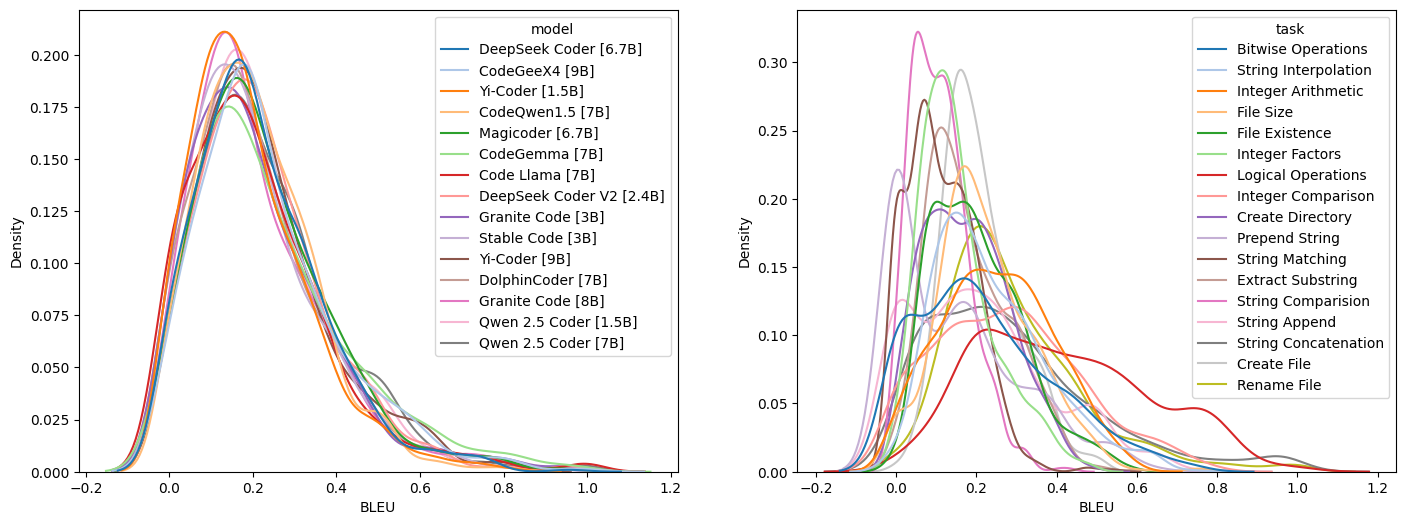

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="BLEU", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="BLEU", hue="task", palette="tab20", ax=ax[1])

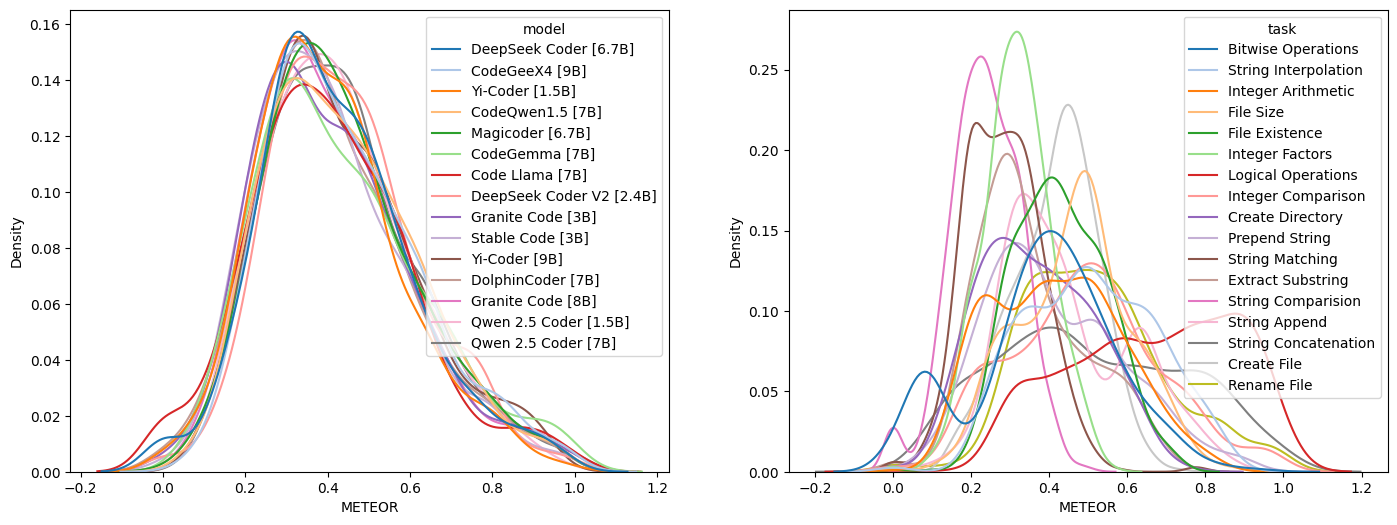

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="METEOR", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="METEOR", hue="task", palette="tab20", ax=ax[1])

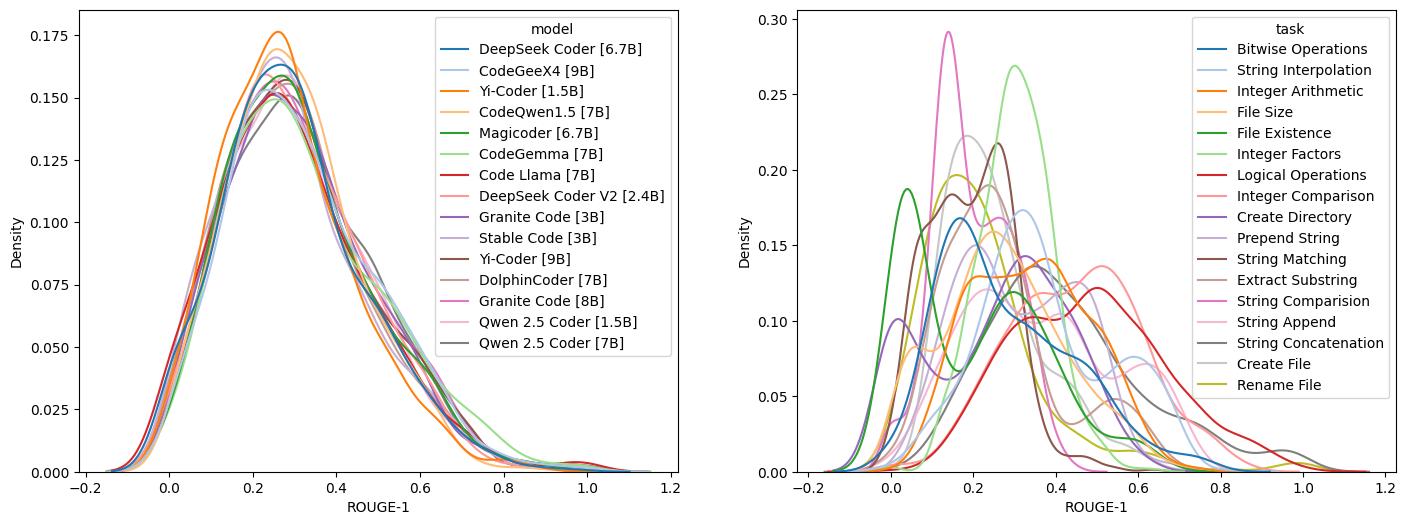

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="ROUGE-1", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="ROUGE-1", hue="task", palette="tab20", ax=ax[1])

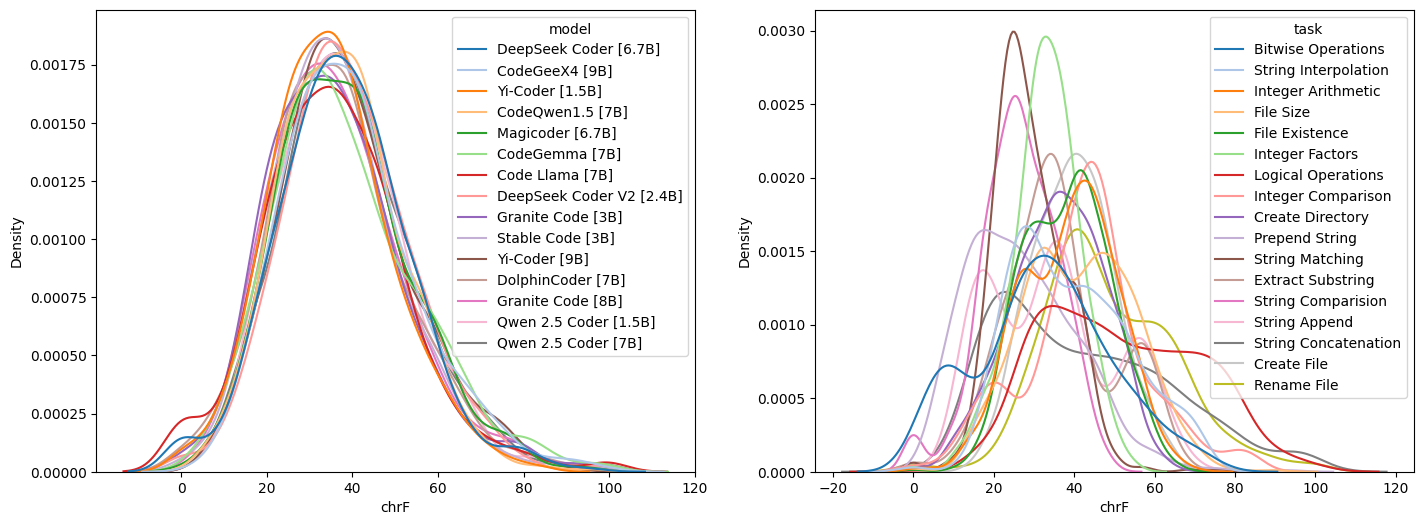

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="chrF", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="chrF", hue="task", palette="tab20", ax=ax[1])

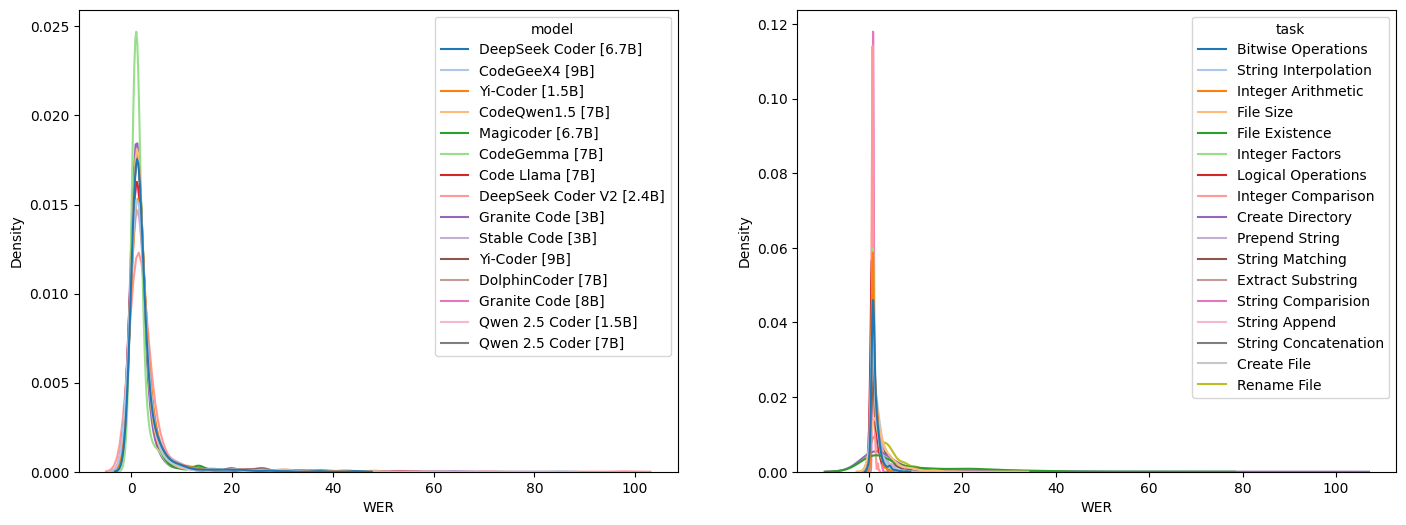

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="WER", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="WER", hue="task", palette="tab20", ax=ax[1])

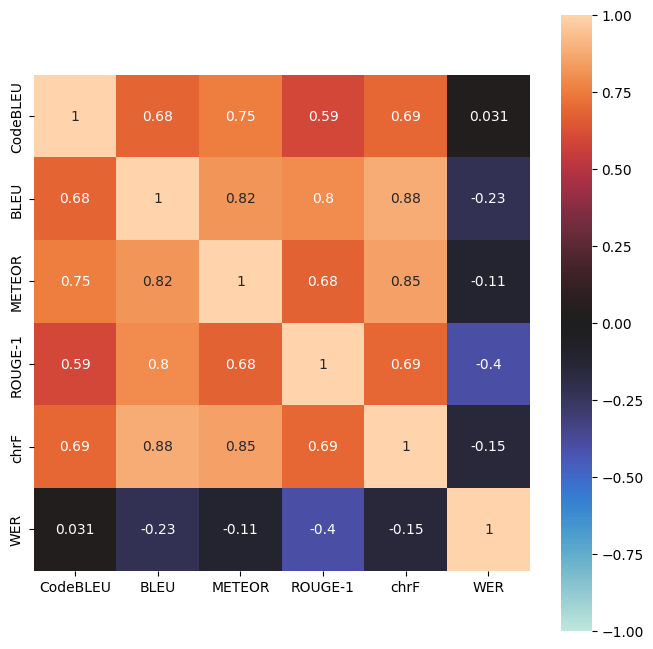

In [14]:
cols = [
    "CodeBLEU",
    "BLEU",
    "METEOR",
    "ROUGE-1",
    "chrF",
    "WER",
]
fig, ax = plt.subplots(figsize=(8, 8))
_ = sns.heatmap(
    metrics[cols].corr(), vmax=1, vmin=-1, center=0, annot=True, square=True, ax=ax
)

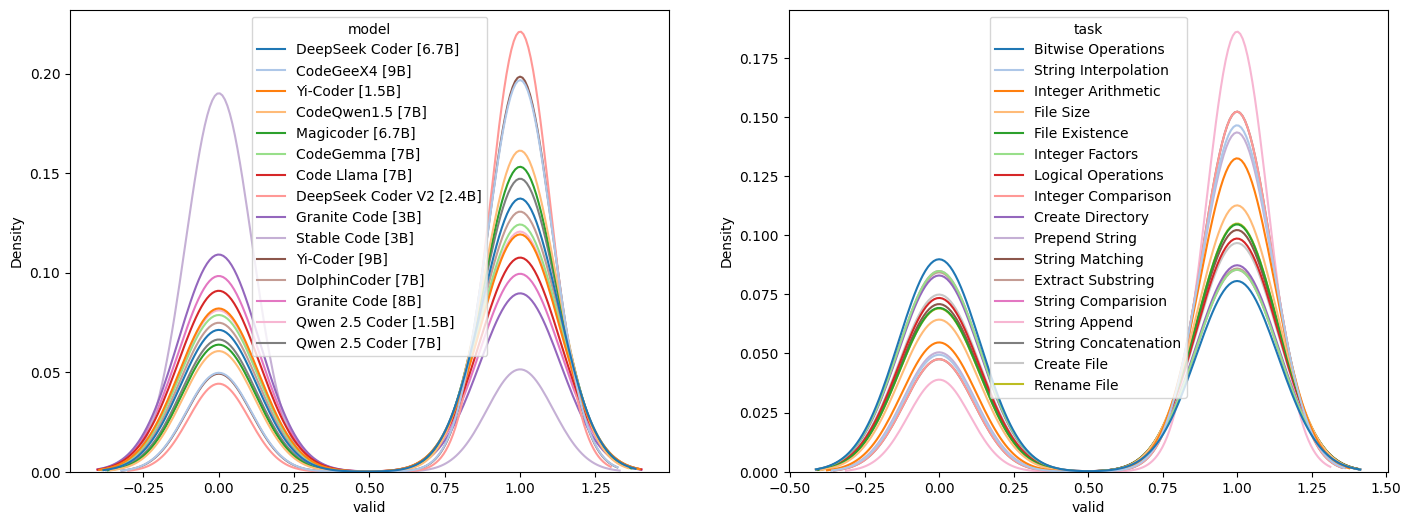

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
_ = sns.kdeplot(metrics, x="valid", hue="model", palette="tab20", ax=ax[0])
_ = sns.kdeplot(metrics, x="valid", hue="task", palette="tab20", ax=ax[1])